In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr


In [2]:
data=pd.read_csv("loan.csv")

In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data=data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


<AxesSubplot:>

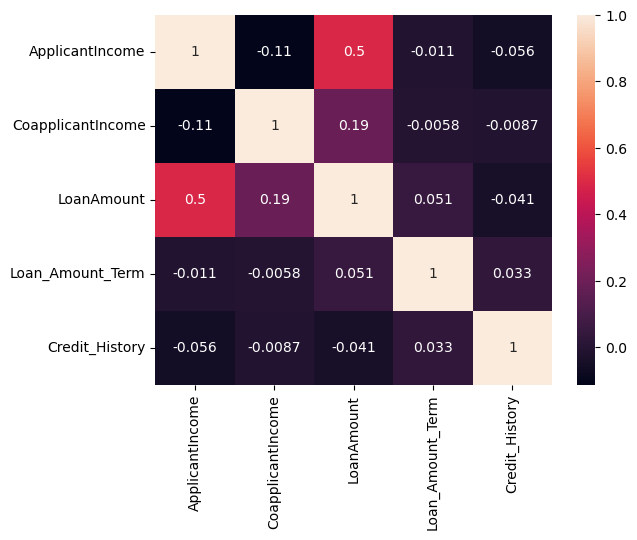

In [8]:
tc=data.corr()
sns.heatmap(tc,annot=True)

In [9]:
data.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [10]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

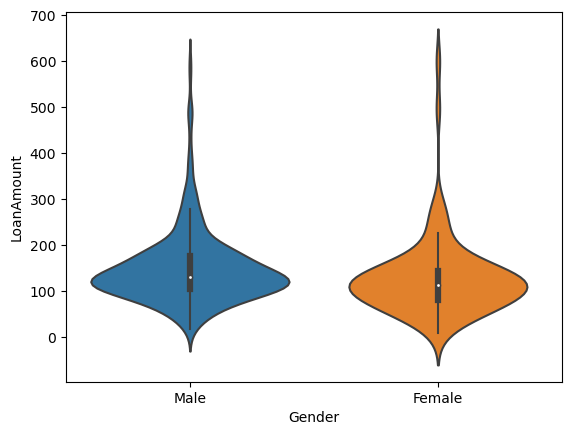

In [11]:
sns.violinplot(x='Gender',y='LoanAmount',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

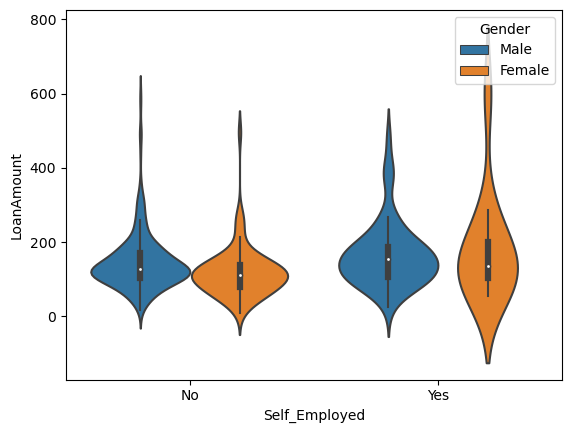

In [12]:
sns.violinplot(x='Self_Employed',y='LoanAmount',hue='Gender',data=data)

In [13]:
data=data.drop('Loan_ID',axis=1)

In [14]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
data.replace({"Gender":{"Male":1,"Female":0}},inplace=True)

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

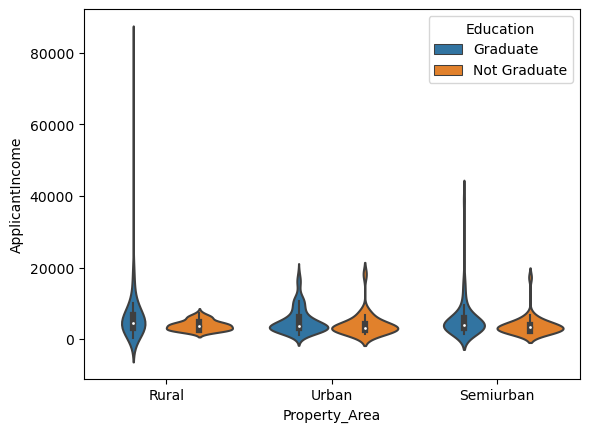

In [16]:
sns.violinplot(x='Property_Area',y='ApplicantIncome',hue='Education',data=data)

In [17]:
data.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)

In [18]:
data.replace({"Property_Area":{"Rural":0,"Urban":2,"Semiurban":1}},inplace=True)

In [19]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,0,0
2,1,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,1,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,2,1
4,1,No,0,1,No,6000,0.0,141.0,360.0,1.0,2,1
5,1,Yes,2,1,Yes,5417,4196.0,267.0,360.0,1.0,2,1


<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

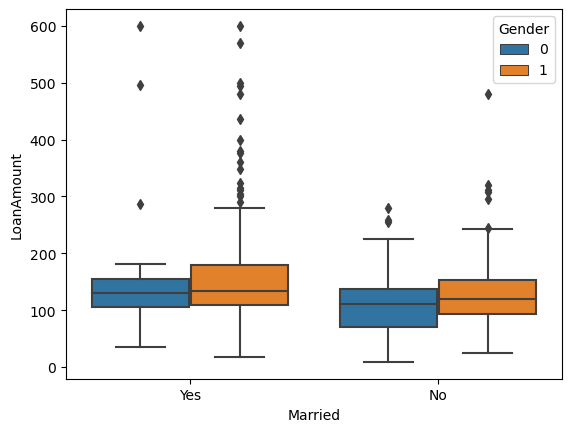

In [20]:
sns.boxplot(x="Married",y="LoanAmount",hue="Gender",data=data)

In [21]:
data.replace({"Married":{"Yes":0,"No":1}},inplace=True)

In [22]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,1,1,No,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,0,0,No,2583,2358.0,120.0,360.0,1.0,2,1
4,1,1,0,1,No,6000,0.0,141.0,360.0,1.0,2,1
5,1,0,2,1,Yes,5417,4196.0,267.0,360.0,1.0,2,1


In [23]:
data.replace({"Self_Employed":{"Yes":1,"No":0}},inplace=True)

In [24]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,0,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,0,3+,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,0,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,0,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,1,0,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


In [29]:
data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,0,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,0,3+,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,0,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,0,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0
10,1,0,2,1,0,3200,700.0,70.0,360.0,1.0,2,1


In [30]:
data=data.replace(to_replace='3+',value=4)

In [31]:
X=data.drop('Loan_Status',axis=1)
Y=data['Loan_Status']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

In [33]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
data_predict=rf.predict(x_test)

In [35]:
from sklearn.metrics import r2_score

In [36]:
print("The accuracy is ",r2_score(data_predict,y_test))

The accuracy is  0.03703703703703709


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lf=LogisticRegression()

In [39]:
lf.fit(x_train,y_train)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
data_predict2=lf.predict(x_test)

In [41]:
print(r2_score(data_predict2,y_test))

-0.13960113960113962


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
print(accuracy_score(data_predict,y_test))

0.8194444444444444


In [68]:
def loanra(Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area):
    z=np.array([Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area])
    prediction=rf.predict(z.reshape(1,-1))
    return prediction


In [75]:
outputs=gr.outputs.Textbox()
app=gr.Interface(fn=loanra,inputs=['number','number','number','number','number','number','number','number','number','number','number'],outputs=['number'],description="This is a loan model")

C:\Users\Hi\AppData\Local\Temp\ipykernel_4876\2682292796.py:1: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Textbox()


In [76]:
app.launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


C:\Users\Hi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\gradio\components\button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
